In [1]:
from manim import *
from numpy import linalg as npl
import matplotlib.pyplot as plt
import jupyter_capture_output
from scipy.interpolate import make_interp_spline, BSpline

video_scene = " -v WARNING --progress_bar None --disable_caching li_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s li_Scene"

Manim Community v0.16.0.post0

Jupyter Capture Output v0.0.6


In [28]:
from numpy import arctan2


def F1(r):
    r = r / 2
    x = np.sin(r[1])
    y = np.cos(r[0]) + r[1] / 4
    return 2*x * RIGHT + 2*y * UP


def gamma1(t):
    x = t / 2 - 2 * np.sin(t) 
    y = -t / 5 
    return np.array([x, y, 0])


def dgamma1(t):
    return (gamma1(t+0.01) - gamma1(t)) / 0.01


def F1_gamma(t):
    r = gamma1(t)
    r = r * 2
    x = np.sin(r[1])
    y = np.cos(r[0]) + r[1] / 4
    return np.array([x, y, 0]) * 2


def F_dot_dgamma(t):
    return np.dot(F1_gamma(t), dgamma1(t))


def angle(v1, v2):
    v1_abs = npl.norm(v1)
    v2_abs = npl.norm(v2)
    angle = arctan2(np.dot(v1, v2), v1[0]*v2[1]-v1[1]*v2[0])
    return angle


t0 = -4
t1 = 4


# Max-R
t_array = np.linspace(t0, t1, 10000)
max_dgamma1_norm = max([npl.norm(dgamma1(t))] for t in t_array)
max_F1_gamma_norm = max([npl.norm(F1_gamma(t))] for t in t_array)
max_r = max([max_dgamma1_norm, max_F1_gamma_norm])[0]/3

max_r, dgamma1(t0), F1_gamma(t0), F_dot_dgamma(t0)

(1.1363828396931506,
 array([ 1.81483342, -0.2       ,  0.        ]),
 array([1.99914721, 2.27149759, 0.        ]),
 3.173819633848397)

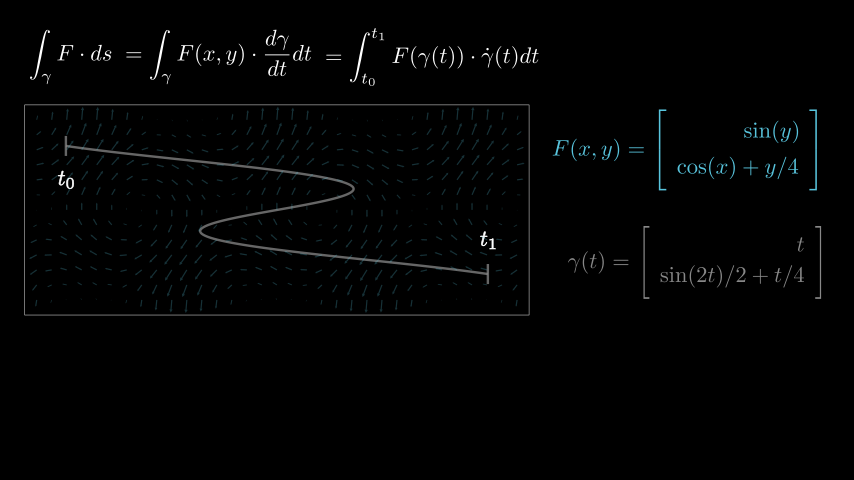

In [43]:
%%capture_video --path "animations/line_integration/line_integration_Intro1.mp4"
%%manim -ql --fps 20 $video_scene


# Equations
F_eq1 = MathTex(r'F(x, y)=', font_size = 36, color = BLUE).align_on_border(LEFT).align_on_border(RIGHT, buff = 3.5).shift(1.5*UP)
F_vec = Matrix([[r'\mathrm{sin}(y)'], [r'\mathrm{cos}(x)+y/4']]).scale(0.75).next_to(F_eq1, RIGHT).set_color(BLUE)
F_eq = VGroup(F_eq1, F_vec)

gamma_eq1 = MathTex(r'\gamma(t)=', font_size = 36, color = GREY).next_to(F_eq1, 6*DOWN)
gamma_vec = Matrix([[r't'], [r'\mathrm{sin}(2t)/2+t/4']]).scale(0.75).next_to(gamma_eq1, RIGHT).set_color(GREY)
gamma_eq = VGroup(gamma_eq1, gamma_vec)

li_eq1 = MathTex(r'\int_{\gamma}F\cdot ds', font_size = 36).align_on_border(UP + LEFT, buff = 0.5)
li_eq2 = MathTex(r'=\int_{\gamma}F(x, y)\cdot\frac{d\gamma}{dt}dt', font_size = 36).next_to(li_eq1, RIGHT)
li_eq3 = MathTex(r'=\int_{t_0}^{t_1}F(\gamma(t))\cdot\dot{\gamma}(t)dt', font_size = 36).next_to(li_eq2, RIGHT)


# Field
ax = Axes(x_range = [-4, 4, 1], y_range = [-1.5, 1.5, 1], x_length = 8, y_length = 4).set_opacity(0)
gamma_curve = ax.plot_parametric_curve(gamma1, t_range = [t0, t1], stroke_opacity = 0.75, color = GREY)
t0_line = Line(
    start = ax.coords_to_point(gamma1(t0)[0], gamma1(t0)[1] - 0.125, 0), 
    end = ax.coords_to_point(gamma1(t0)[0], gamma1(t0)[1] + 0.125, 0), stroke_opacity = 0.75, color = GREY)
t1_line = Line(
    start = ax.coords_to_point(gamma1(t1)[0], gamma1(t1)[1] - 0.125, 0), 
    end = ax.coords_to_point(gamma1(t1)[0], gamma1(t1)[1] + 0.125, 0), stroke_opacity = 0.75, color = GREY)
t0_label = MathTex(r't_0', font_size = 36, stroke_width = 1).next_to(t0_line, DOWN)
t1_label = MathTex(r't_1', font_size = 36, stroke_width = 1).next_to(t1_line, UP)
traj = VGroup(gamma_curve, t0_line, t1_line, t0_label, t1_label)

avf = ArrowVectorField(
    F1, x_range = [-16, 16, 1], y_range = [-6, 6, 1], length_func = lambda x: x/4, 
    colors = [BLUE], opacity = 0.25, vector_config = {'stroke_width': 2}).scale(0.25)
rect = Rectangle(width = 8.4, height = 3.5, stroke_width = 0.75)
field = VGroup(ax, traj, avf, rect).shift(2.5*LEFT + 0.5*UP)


# Starting Animation
class li_Scene(Scene):
    def construct(self):
        self.add(li_eq1, li_eq2, li_eq3, F_eq, gamma_eq, field)

        # Intro Animation
        # self.play(Write(li_eq1)) 
        # self.play(Write(li_eq2))
        # self.play(Write(F), Transform(li_eq2, li_eq2_Fblue))
        # self.play(TransformFromCopy(F, avf), FadeIn(rect))
        # self.play(Write(gamma), Transform(li_eq2_Fblue, li_eq2))
        # self.play(TransformFromCopy(gamma, traj))
        # self.play(Write(li_eq3))
        # self.wait(3)

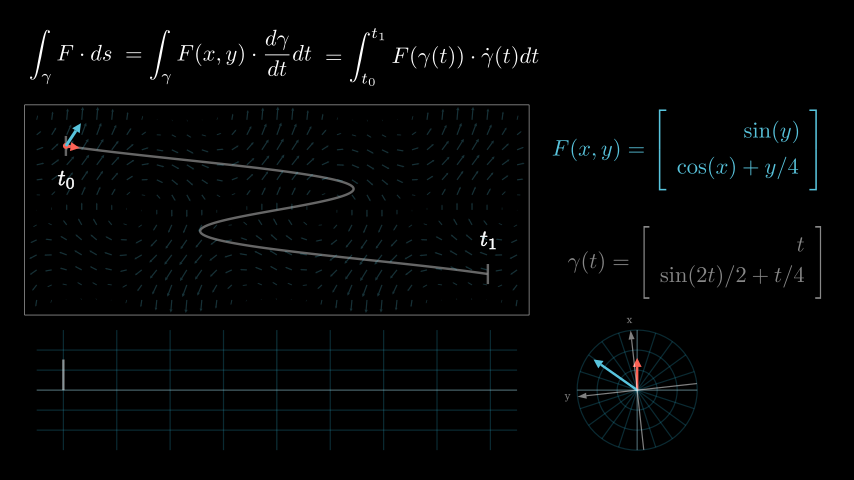

In [44]:
%%capture_video --path "animations/line_integration/line_integration_Intro2.mp4"
%%manim -ql --fps 20 $video_scene


# Vector Animation Setup
npla = NumberPlane(
    x_range = [-4.5, 4.5, 1], y_range = [-3, 3, 1], x_length = 8, y_length = 2, axis_config = {"include_numbers": False, "stroke_opacity": 0.25}, 
    background_line_style = {"stroke_opacity": 0.25}, y_axis_config = {"stroke_opacity": 0.25, "stroke_width": 0.25, "stroke_color": TEAL}).shift(2.5*LEFT + 2.5*DOWN)
ppla = PolarPlane(
    radius_max = 3, size = 2, azimuth_offset = PI/2, x_axis_config = {"stroke_opacity": 0.25}, y_axis_config = {"stroke_opacity": 0.25}, 
    background_line_style = {"stroke_opacity": 0.25}).shift(2.5*DOWN + 3.5*RIGHT)

traj_dot = Dot(ax.c2p(gamma1(t0)[0], gamma1(t0)[1]), radius = 0.05, color = RED)
traj_arrow = Line(
    start = ax.c2p(gamma1(t0)[0], gamma1(t0)[1]), 
    end = ax.c2p(gamma1(t0)[0] + dgamma1(t0)[0] / 8, gamma1(t0)[1] + dgamma1(t0)[1] / 8), 
    color = RED, buff = 0, stroke_width = 5).add_tip(tip_length = 0.15, tip_width = 0.15)
traj_dgv = VGroup(traj_dot, traj_arrow)

F_arrow = Line(
    start = ax.c2p(gamma1(t0)[0], gamma1(t0)[1]), 
    end = ax.c2p(gamma1(t0)[0] + F1_gamma(t0)[0] / 8, gamma1(t0)[1] + F1_gamma(t0)[1] / 8), 
    color = BLUE, buff = 0, stroke_width = 5).add_tip(tip_length = 0.15, tip_width = 0.15)


# Polar Animation
pol_center = ppla.pr2pt(0, 0)
pol_dgv_len = npl.norm(dgamma1(t0)) / max_r
pol_F_len = npl.norm(F1_gamma(t0)) / max_r
pol_F_tip = ppla.pr2pt(pol_F_len, angle(F1_gamma(t0), dgamma1(t0)))

pol_x_start = ppla.pr2pt(-3, angle([1, 0, 0], dgamma1(t0)))
pol_x_end = ppla.pr2pt(3, angle([1, 0, 0], dgamma1(t0)))

pol_y_start = ppla.pr2pt(-3, angle([0, 1, 0], dgamma1(t0)))
pol_y_end = ppla.pr2pt(3, angle([0, 1, 0], dgamma1(t0)))

#hor_bar_x_start = 
#hor_bar_y_start

pol_dgv = Line(pol_center, ppla.pr2pt(pol_dgv_len, PI/2), color = RED, stroke_width = 4).add_tip(tip_length = 0.15, tip_width = 0.15)
pol_F = Line(pol_center, pol_F_tip, color = BLUE, stroke_width = 4).add_tip(tip_length = 0.15, tip_width = 0.15) 
x_line = Line(pol_x_start, pol_x_end, color = WHITE, stroke_width = 2).add_tip(tip_length = 0.15, tip_width = 0.1).set_opacity(0.5) 
y_line = Line(pol_y_start, pol_y_end, color = WHITE, stroke_width = 2).add_tip(tip_length = 0.15, tip_width = 0.1).set_opacity(0.5)  

x_label = Text('x', font_size = 12).move_to(ppla.pr2pt(3.5, angle([1, 0, 0], dgamma1(t0)))).set_opacity(0.5) 
y_label = Text('y', font_size = 12).move_to(ppla.pr2pt(3.5, angle([0, 1, 0], dgamma1(t0)))).set_opacity(0.5) 


# Cart Animation
F_dot_dgamma_func = npla.plot(lambda t_var: F_dot_dgamma(t_var) / npl.norm(dgamma1(t_var))/ max_r, color = WHITE, x_range = [t0, t0])
F_dot_dgamma_area = npla.get_area(F_dot_dgamma_func, [t0, t1], bounded_graph = npla.plot(lambda t_var: 0, x_range = [t0, t0]), color = WHITE, opacity = 0.5)


# Coordinate Setup
class li_Scene(Scene):
    def construct(self):
        self.add(li_eq1, li_eq2, li_eq3, F_eq, gamma_eq, field)
        self.add(npla, ppla, traj_dgv, F_arrow)
        self.add(pol_dgv, pol_F, x_line, y_line, x_label, y_label)
        self.add(F_dot_dgamma_func, F_dot_dgamma_area)

In [45]:
%%capture_video --path "animations/line_integration/line_integration_Traj.mp4"
%%manim -ql --fps 20 $video_scene

# Integration Animation
class li_Scene(Scene):
    def construct(self):
        self.add(li_eq1, li_eq2, li_eq3, F_eq, gamma_eq, field)                 
        self.add(npla, ppla, traj_dgv, F_arrow)
        self.add(pol_dgv, pol_F, x_line, y_line, x_label, y_label)
        self.add(F_dot_dgamma_func, F_dot_dgamma_area)
        

        # Vector Animation
        def dgv_updater(v):
            t = time.get_value()

            gamma1_t = gamma1(t)
            dgamma1_t = dgamma1(t)

            dot_new = Dot(ax.c2p(gamma1_t[0], gamma1_t[1]), radius = 0.05, color = RED)
            arrow_new = Line(
                start = ax.c2p(gamma1_t[0], gamma1_t[1]), 
                end = ax.c2p(gamma1_t[0] + dgamma1_t[0] / 8, gamma1_t[1] + dgamma1_t[1] / 8), 
                color = RED, stroke_width = 4, buff = 0).add_tip(tip_length = 0.15, tip_width = 0.15)
            dgv_new = VGroup(dot_new, arrow_new)
            v.become(dgv_new)

        def F_updater(v):
            t = time.get_value()

            F1_gamma_t = F1_gamma(t)
            gamma1_t = gamma1(t)

            F_arrow_new = Line(
                start = ax.c2p(gamma1_t[0], gamma1_t[1]), 
                end = ax.c2p(gamma1_t[0] + F1_gamma_t[0] / 8, gamma1_t[1] + F1_gamma_t[1] / 8), 
                color = BLUE, stroke_width = 4, buff = 0).add_tip(tip_length = 0.15, tip_width = 0.15)
            v.become(F_arrow_new)


        # Polar Animation
        def pol_dgv_updater(v):
            t = time.get_value()
            new_pol_dgv = Line(pol_center, ppla.pr2pt(npl.norm(dgamma1(t)) / max_r, PI/2), color = RED, stroke_width = 4).add_tip(tip_length = 0.15, tip_width = 0.15)
            v.become(new_pol_dgv)

        def pol_F_updater(v):
            t = time.get_value()
            new_pol_F = Line(
                pol_center, ppla.pr2pt(npl.norm(F1_gamma(t)) / max_r, angle(F1_gamma(t), dgamma1(t))), 
                color = BLUE, stroke_width = 4).add_tip(tip_length = 0.15, tip_width = 0.15) 
            v.become(new_pol_F)

        def x_line_updater(v):
            t = time.get_value()
            new_x_line = Line(
                ppla.pr2pt(-3, angle([1, 0, 0], dgamma1(t))), ppla.pr2pt(3, angle([1, 0, 0], dgamma1(t))), 
                color = WHITE, stroke_width = 2).add_tip(tip_length = 0.1, tip_width = 0.1).set_opacity(0.5) 
            v.become(new_x_line) 
        
        def y_line_updater(v):
            t = time.get_value()
            new_y_line = Line(
                ppla.pr2pt(-3, angle([0, 1, 0], dgamma1(t))), ppla.pr2pt(3, angle([0, 1, 0], dgamma1(t))), 
                color = WHITE, stroke_width = 2).add_tip(tip_length = 0.1, tip_width = 0.1).set_opacity(0.5) 
            v.become(new_y_line) 

        def x_label_updater(label):
            t = time.get_value()
            x_label_new = Text('x', font_size = 12).move_to(ppla.pr2pt(3.5, angle([1, 0, 0], dgamma1(t)))).set_opacity(0.5) 
            label.become(x_label_new)

        def y_label_updater(label):
            t = time.get_value()
            y_label_new = Text('y', font_size = 12).move_to(ppla.pr2pt(3.5, angle([0, 1, 0], dgamma1(t)))).set_opacity(0.5) 
            label.become(y_label_new)


        # Integration Animation
        def F_dot_dgamma_func_updater(func):
            t = time.get_value()
            new_F_dot_dgamma_func = npla.plot(lambda t_var: F_dot_dgamma(t_var) / npl.norm(dgamma1(t_var))/ max_r, color = WHITE, x_range = [t0, t])
            func.become(new_F_dot_dgamma_func)

        def F_dot_dgamma_area_updater(area):
            t = time.get_value()
            new_F_dot_dgamma_func = npla.plot(lambda t_var: F_dot_dgamma(t_var) / npl.norm(dgamma1(t_var))/ max_r, color = WHITE, x_range = [t0, t])
            new_F_dot_dgamma_area = npla.get_area(new_F_dot_dgamma_func, [t0, t], bounded_graph = npla.plot(lambda t_var: 0, x_range = [t0, t]), color = WHITE, opacity = 0.5)
            area.become(new_F_dot_dgamma_area)


        # Add Updater
        traj_dgv.add_updater(dgv_updater)
        F_arrow.add_updater(F_updater)
        pol_dgv.add_updater(pol_dgv_updater)
        pol_F.add_updater(pol_F_updater)
        x_line.add_updater(x_line_updater)
        y_line.add_updater(y_line_updater)
        x_label.add_updater(x_label_updater)
        y_label.add_updater(y_label_updater)
        F_dot_dgamma_func.add_updater(F_dot_dgamma_func_updater)
        F_dot_dgamma_area.add_updater(F_dot_dgamma_area_updater)

        time = ValueTracker(t0) 
        self.play(time.animate.set_value(t1), rate_func= linear, run_time = 15)
        self.wait(3)